In [1]:
import os
from dotenv import load_dotenv
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load .env file
load_dotenv('../.env.local')  # Adjust the relative path according to your directory structure

# Get the project path from environment variables
project_path = os.getenv('MY_PROJECT_PATH')

# Read CSV into DataFrame
df = pd.read_csv(project_path)

In [3]:
df.head()

,Unnamed: 0,Rank,Champion Name,Tier,Win rate,Pick Rate,Ban Rate,Matches,gameDuration,allInPings,...,turretTakedowns_y,turretsTakenWithRiftHerald,twentyMinionsIn3SecondsCount,twoWardsOneSweeperCount,unseenRecalls,visionScoreAdvantageLaneOpponent,visionScorePerMinute,wardTakedowns,wardTakedownsBefore20M,wardsGuarded
0,0,1,Swain,S,53.87,12.0,1.7,19216,1711,0,...,7,0,4,0,0,0.731238,1.166228,4,2,1
1,1,1,Swain,S,53.87,12.0,1.7,19216,1987,0,...,1,0,9,0,0,-0.407494,0.594141,1,1,0
2,2,1,Swain,S,53.87,12.0,1.7,19216,1495,0,...,1,0,8,0,0,-0.782050,0.388326,1,0,0
3,3,1,Swain,S,53.87,12.0,1.7,19216,1528,1,...,1,5,6,0,0,-0.055465,0.637202,4,3,0
4,4,1,Swain,S,53.87,12.0,1.7,19216,1155,0,...,0,0,1,0,0,-0.218048,1.941728,1,1,0


In [4]:
headers = df.columns.tolist()
print(headers)

['Unnamed: 0', 'Rank', 'Champion Name', 'Tier', 'Win rate', 'Pick Rate', 'Ban Rate', 'Matches', 'gameDuration', 'allInPings', 'assistMePings', 'assists', 'baitPings', 'baronKills', 'bountyLevel', 'champExperience', 'champLevel', 'championId', 'championName', 'championTransform', 'commandPings', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'dangerPings', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'eligibleForProgression', 'enemyMissingPings', 'enemyVisionPings', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'getBackPings', 'goldEarned', 'goldSpent', 'holdPings', 'individualPosition', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees_x', 'kills', 'lane', 'largestCriticalStrike', 'largestKillingSpree', 'larg

In [5]:
df_prediction = df[['Unnamed: 0', 'Rank', 'Champion Name', 'Tier', 'Win rate', 'Pick Rate', 'Ban Rate', 'Matches', 'championId', 'championName', 'lane', 'playerAugment1', 'playerAugment2', 'playerAugment3', 'playerAugment4', 'playerSubteamId', 'role',  'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id', 'summonerLevel', 'summonerName', 'teamId', 'teamPosition', 'win']]

In [6]:
# Check for missing values in the dataset
missing_values = df_prediction.isnull().sum()
missing_values[missing_values > 0]

teamPosition    2
dtype: int64

In [7]:
df_prediction

,Unnamed: 0,Rank,Champion Name,Tier,Win rate,Pick Rate,Ban Rate,Matches,championId,championName,...,role,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerLevel,summonerName,teamId,teamPosition,win
0,0,1,Swain,S,53.87,12.0,1.7,19216,50,Swain,...,SOLO,3,4,6,3,546,Peak Level,100,BOTTOM,True
1,1,1,Swain,S,53.87,12.0,1.7,19216,50,Swain,...,CARRY,3,4,4,6,105,ShunpoLol,100,BOTTOM,False
2,2,1,Swain,S,53.87,12.0,1.7,19216,50,Swain,...,CARRY,1,4,4,6,212,TheAfricanDream,100,BOTTOM,False
3,3,1,Swain,S,53.87,12.0,1.7,19216,50,Swain,...,CARRY,5,6,3,4,681,f3ed l0rd,100,BOTTOM,True
4,4,1,Swain,S,53.87,12.0,1.7,19216,50,Swain,...,SUPPORT,3,14,3,4,671,Μxe,200,UTILITY,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252374,252374,227,Sejuani,D,46.62,26.0,0.4,42265,113,Sejuani,...,SUPPORT,9,11,2,4,85,Ouizay,100,JUNGLE,True
252375,252375,227,Sejuani,D,46.62,26.0,0.4,42265,113,Sejuani,...,NONE,2,4,8,11,45,TONYMONTANA34,100,JUNGLE,False
252376,252376,227,Sejuani,D,46.62,26.0,0.4,42265,113,Sejuani,...,NONE,18,11,4,4,400,darkrïzen,100,JUNGLE,True
252377,252377,227,Sejuani,D,46.62,26.0,0.4,42265,113,Sejuani,...,SUPPORT,4,4,16,11,37,KΛRTΗUS,200,JUNGLE,False


In [8]:
from sklearn.preprocessing import OrdinalEncoder

# Selecting the columns to be encoded
columns_to_encode = ['Champion Name', 'Tier', 'lane', 'role', 'summonerName', 'teamPosition', 'win', 'championName']

# Initialize the Ordinal Encoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the selected columns
encoded_values = ordinal_encoder.fit_transform(df_prediction[columns_to_encode])

# Replace the original columns with encoded values
df_prediction.loc[:, columns_to_encode] = encoded_values

# Show the updated DataFrame
df_prediction.head()


,Unnamed: 0,Rank,Champion Name,Tier,Win rate,Pick Rate,Ban Rate,Matches,championId,championName,...,role,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerLevel,summonerName,teamId,teamPosition,win
0,0,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,3.0,3,4,6,3,546,17645.0,100,0.0,1.0
1,1,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,0.0,3,4,4,6,105,20869.0,100,0.0,0.0
2,2,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,0.0,1,4,4,6,212,22970.0,100,0.0,0.0
3,3,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,0.0,5,6,3,4,681,28039.0,100,0.0,1.0
4,4,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,4.0,3,14,3,4,671,33854.0,200,4.0,0.0


C:\Programmieren\Leaguify_Website\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Programmieren\Leaguify_Website\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Programmieren\Leaguify_Website\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Programmieren\Leaguify_Website\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

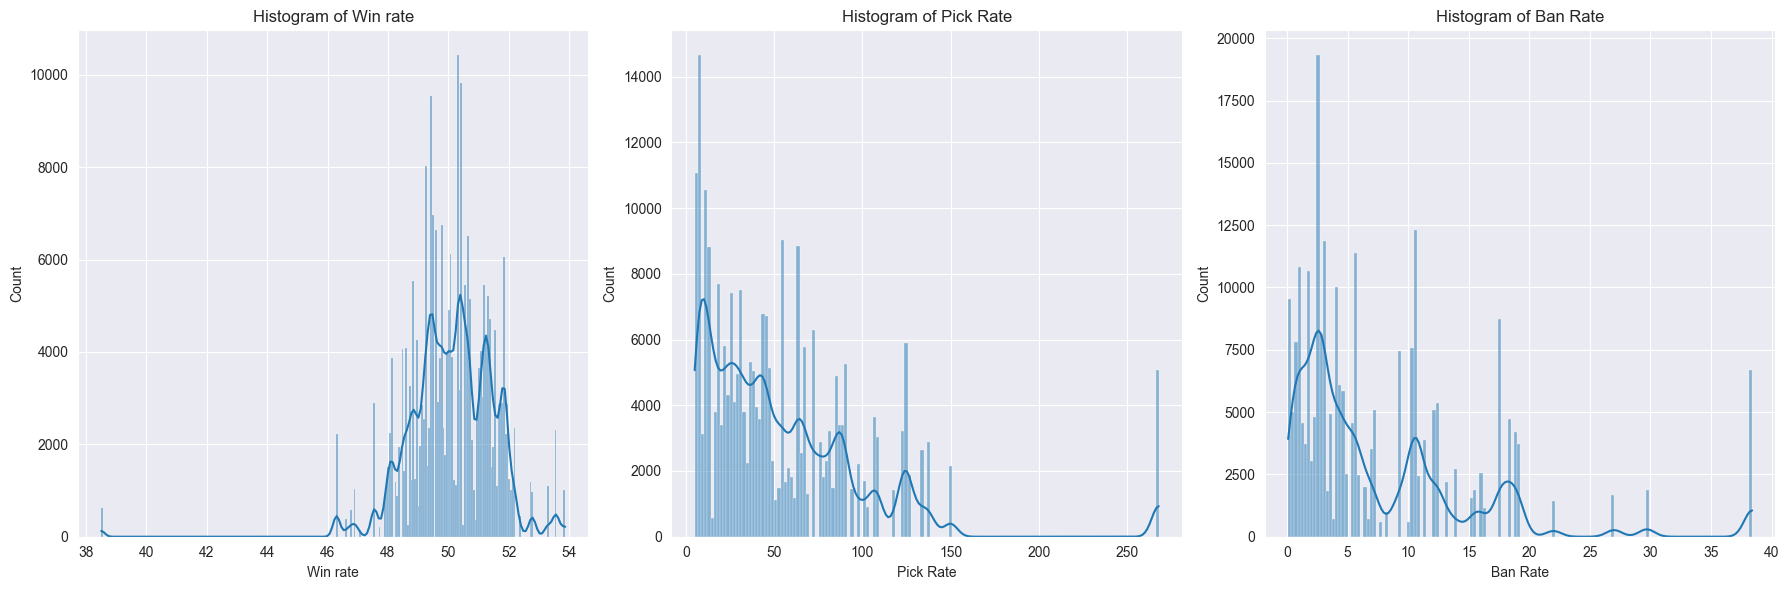

In [9]:
# List of numerical columns to visualize
numerical_columns = ['Win rate', 'Pick Rate', 'Ban Rate']

# Create histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [10]:
import numpy as np

# Remove rows containing NaN or infinity values in a more memory-efficient manner
df_prediction.dropna(inplace=True)
df_prediction.replace([np.inf, -np.inf], np.nan, inplace=True)
df_prediction.dropna(inplace=True)

# Re-check the shape of the DataFrame to see how many rows were removed
df_prediction.shape

C:\Users\nicol\AppData\Local\Temp\ipykernel_20216\1873542579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction.dropna(inplace=True)
C:\Users\nicol\AppData\Local\Temp\ipykernel_20216\1873542579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\nicol\AppData\Local\Temp\ipykernel_20216\1873542579.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

(252377, 26)

In [11]:
df_prediction.head()

,Unnamed: 0,Rank,Champion Name,Tier,Win rate,Pick Rate,Ban Rate,Matches,championId,championName,...,role,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerLevel,summonerName,teamId,teamPosition,win
0,0,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,3.0,3,4,6,3,546,17645.0,100,0.0,1.0
1,1,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,0.0,3,4,4,6,105,20869.0,100,0.0,0.0
2,2,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,0.0,1,4,4,6,212,22970.0,100,0.0,0.0
3,3,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,0.0,5,6,3,4,681,28039.0,100,0.0,1.0
4,4,1,105.0,4.0,53.87,12.0,1.7,19216,50,105.0,...,4.0,3,14,3,4,671,33854.0,200,4.0,0.0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Separate features (X) from the target (y)
X = df_prediction.drop('win', axis=1)
y = df_prediction['win']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train the models
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
logistic_pred = logistic_model.predict(X_test_scaled)

# Evaluate the models
logistic_accuracy = accuracy_score(y_test, logistic_pred)

logistic_accuracy

0.5222085743719788

In [13]:
random_forest_model.fit(X_train_scaled, y_train)

random_forest_pred = random_forest_model.predict(X_test_scaled)

random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

random_forest_accuracy

0.6039305808701165